In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [2]:
data =  pd.read_csv(r'C:\Users\UNION\Documents\Xende fraud detectio\training.csv')
data_test =  pd.read_csv(r'C:\Users\UNION\Documents\Xende fraud detectio\test.csv')
var =  pd.read_csv(r'C:\Users\UNION\Documents\Xende fraud detectio\Xente_Variable_Definitions.csv')


In [3]:
data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [4]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [5]:
data1 = data.drop(['TransactionId', 'BatchId', 'CustomerId',
       'CurrencyCode', 'CountryCode',
        'Amount',
       'TransactionStartTime'],axis=1)

In [6]:
data_test1 = data_test.drop(['TransactionId', 'BatchId', 'CustomerId',
       'CurrencyCode', 'CountryCode',
        'Amount',
       'TransactionStartTime'],axis=1)

In [7]:
data_test1.columns

Index(['AccountId', 'SubscriptionId', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy'],
      dtype='object')

In [8]:
columns=['AccountId', 'SubscriptionId', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'PricingStrategy']

In [9]:
label = LabelEncoder()
for col in columns:
    data1[col] = label.fit_transform(data1[col])

In [10]:
for col in columns:
    data_test1[col] = label.fit_transform(data_test1[col])

In [11]:
data_test2 = data_test1.drop(['AccountId', 'SubscriptionId'],axis=1)

In [12]:
ydata= data1['FraudResult']
xdata = data1.drop(['FraudResult'], axis = 1)

In [16]:
data_dmatrix = xgb.DMatrix(data=xdata1,label=ydata)

C:\Users\UNION\myconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\UNION\myconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [17]:
xg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 100,n_jobs=1)

In [18]:
xg.fit(xdata1,ydata)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [19]:
prexbg = xg.predict(data_test2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:

model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5, decision_function_shape='ovr', degree=3, gamma='auto_deprecated', kernel='rbf', max_iter=-1, probability=False, random_state= 50, shrinking=True, tol=0.11, verbose=False)
model.fit(xdata1,ydata)


C:\Users\UNION\myconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=50,
  shrinking=True, tol=0.11, verbose=False)

In [74]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc.fit(xdata1, ydata)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
dtree = DecisionTreeClassifier(max_leaf_nodes = 100, random_state = 100, criterion = 'entropy', max_depth = 7)
dtree.fit(xdata1,ydata)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [59]:
m = GradientBoostingClassifier(n_estimators = 5000, learning_rate = 0.001, loss='exponential', subsample =0.5, max_depth = 10, min_samples_leaf=6, max_features=7, warm_start=True)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes = 100, random_state = 100, criterion = 'entropy', max_depth = 7,class_weight={1:5}),learning_rate=0.01, n_estimators=100 )


In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
sgd = SGDClassifier(max_iter=100)

In [62]:
sgd.fit(xdata1,ydata)

C:\Users\UNION\myconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
presgd=sgd.predict(data_test2)

In [64]:
presgd

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [65]:
predi=dtree.predict(data_test2)

In [35]:
 ada.fit(xdata1,ydata)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight={1: 5}, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=0.01, n_estimators=100, random_state=None)

In [119]:
preada = ada.predict(data_test2)

In [75]:
prerg = rfc.predict(data_test2)

In [67]:
presvc = model.predict(data_test2)

In [68]:
presvc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
prexbg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
submission = {}
submission['TransactionId'] = TransactionId
submission['FraudResult'] = prerg
submissionFR = pd.DataFrame(submission)
submissionFR.to_csv('submissionFR4.csv', index = False)

In [77]:
submissionFR = pd.read_csv(r'submissionFR4.csv')
submissionFR['FraudResult'].value_counts()

0    44947
1       72
Name: FraudResult, dtype: int64

In [128]:
prexbg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
xdata1=xdata.drop(['AccountId','SubscriptionId'],axis=1)

In [15]:
TransactionId=data_test['TransactionId']

In [183]:
xdata.columns

Index(['AccountId', 'SubscriptionId', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy'],
      dtype='object')

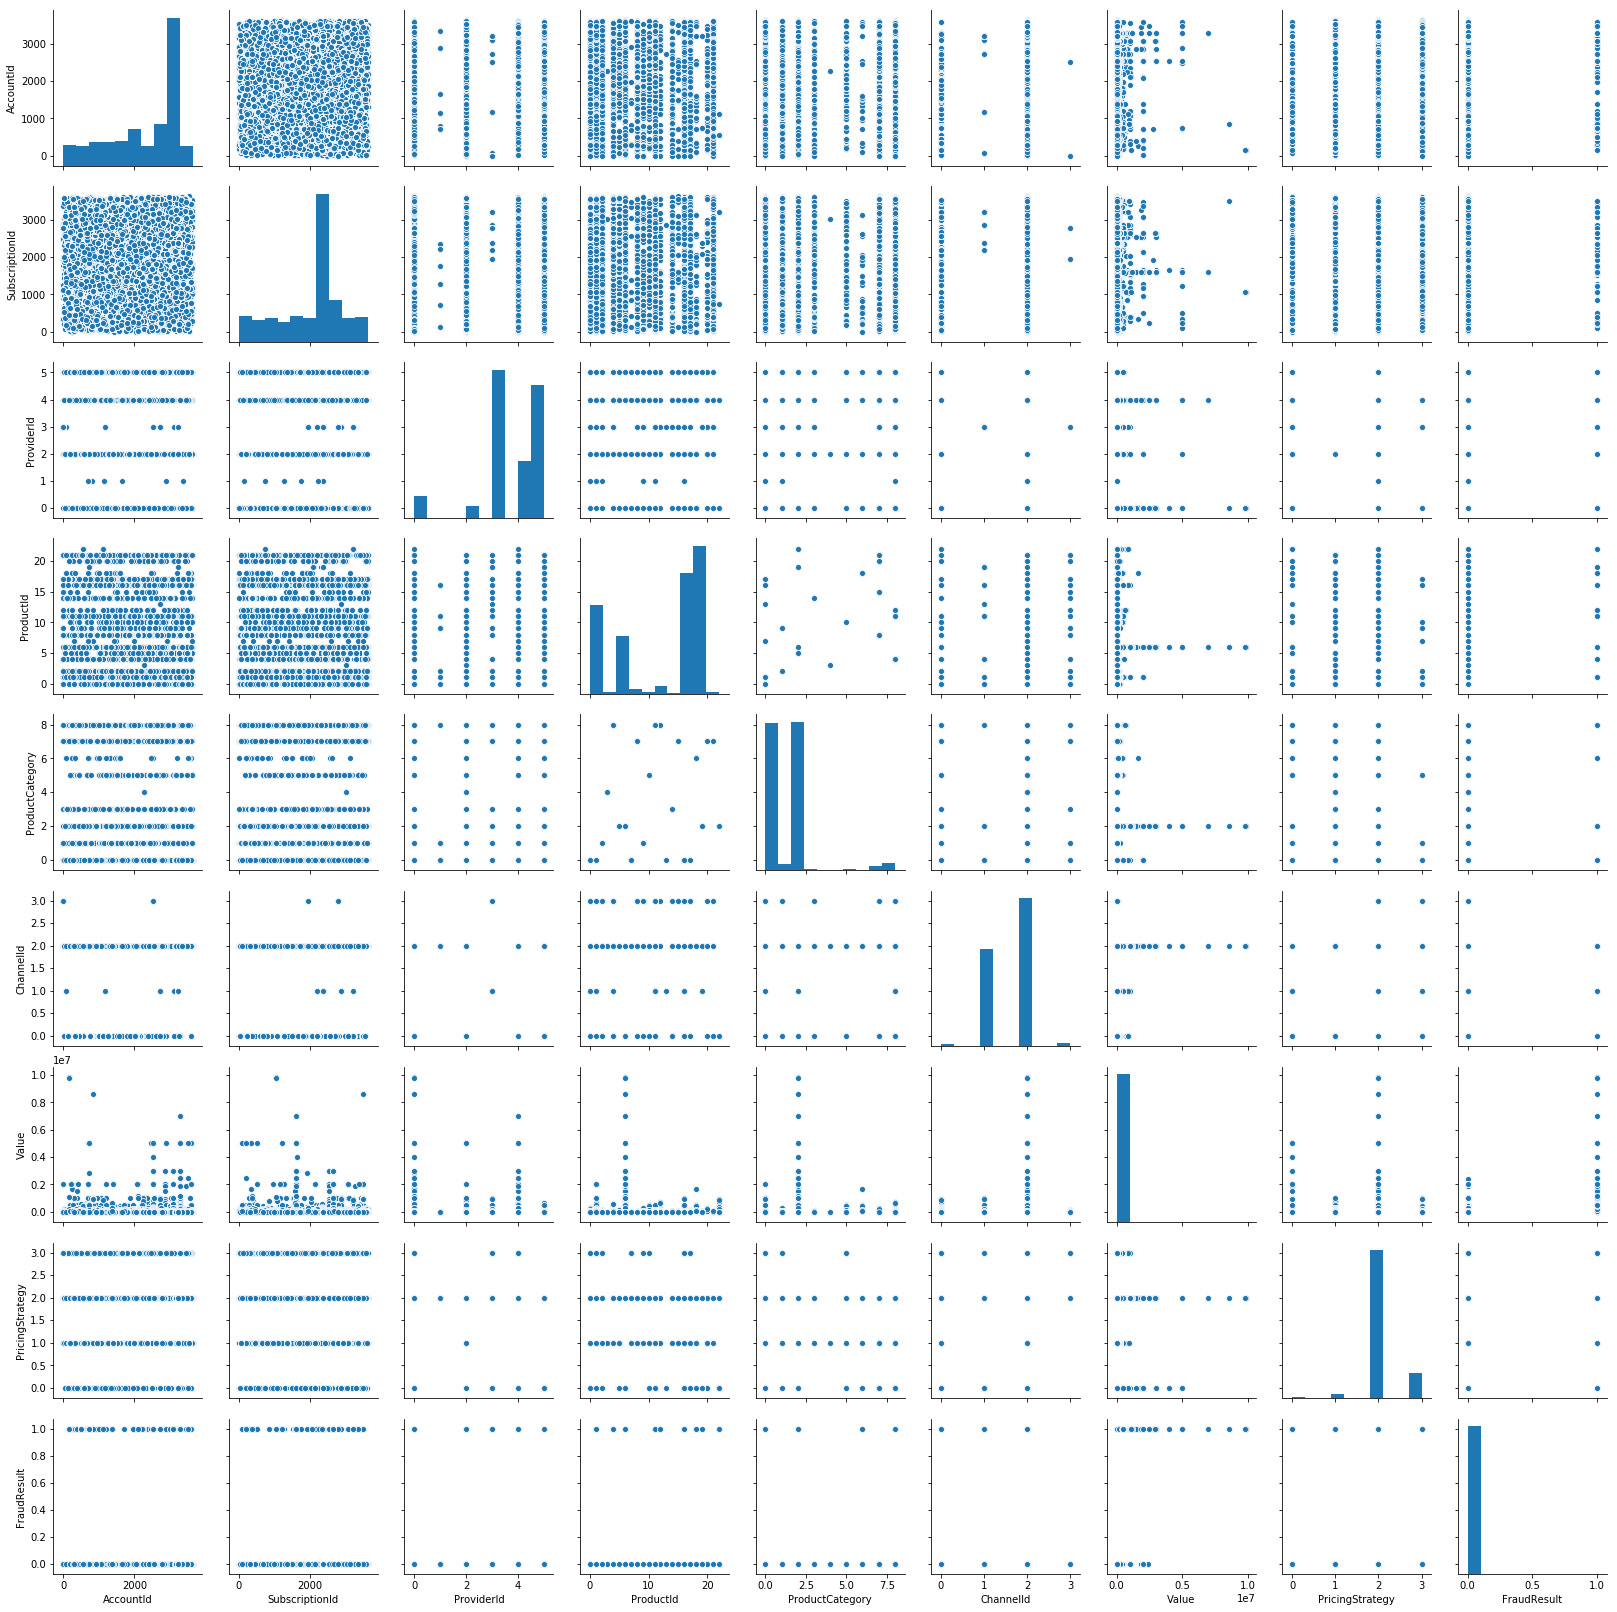

In [185]:
sns.pairplot(data1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [98]:
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=6,kernel_initializer='uniform'))

model.add(Dense(1,activation='sigmoid'))

In [117]:
from keras.optimizers import RMSprop
opt = RMSprop(lr=0.001,decay=1e-6)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
model.fit(xdata1,ydata,batch_size=32,epochs=5,verbose=1)

Epoch 1/5
95662/95662 [==============================] - 106s 1ms/step - loss: 0.0325 - acc: 0.9980 8s - loss:  - ETA: 6s - l - - 
Epoch 2/5
95662/95662 [==============================] - 83s 871us/step - loss: 0.0325 - acc: 0.9980
Epoch 3/5
95662/95662 [==============================] - 28s 292us/step - loss: 0.0325 - acc: 0.99802s - loss: 0.0339 - a - ETA: 2s - loss: 0 - ETA: 
Epoch 4/5
95662/95662 [==============================] - 90s 938us/step - loss: 0.0325 - acc: 0.99802s - loss: 0.03 - ETA: 1s -
Epoch 5/5
95662/95662 [==============================] - 95s 996us/step - loss: 0.0325 - acc: 0.9980


In [119]:
predictions=model.predict_classes(data_test2)

In [120]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [121]:
preds=predictions.ravel()

In [122]:
submission = {}
submission['TransactionId'] = TransactionId
submission['FraudResult'] = preds
submissionFR = pd.DataFrame(submission)
submissionFR.to_csv('submissionfk.csv', index = False)

In [123]:
submissionFile = pd.read_csv(r'submissionfk.csv')

In [124]:
submissionFile['FraudResult'].value_counts()

0    45019
Name: FraudResult, dtype: int64